In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
file_name = []
import os 
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        file_name.append(os.path.join(dirname,filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/classes.json
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_002.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_006.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_005.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_003.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_004.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_007.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 7/images/image_part_009.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/

In [2]:
images_rgb = []
images_mask = []

tiles = ["Tile 1/", "Tile 2/" , "Tile 3/" , "Tile 4/", "Tile 5/", "Tile 6/" , "Tile 7/"]
first_part = "/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/"
last_part = ["image_part_001.png","image_part_002.png","image_part_003.png","image_part_004.png","image_part_005.png","image_part_006.png","image_part_007.png","image_part_008.png","image_part_009.png"]
for i in range(len(tiles)):
    for j in range(len(last_part)):
        image_link = first_part+tiles[i]+"images/"+last_part[j]
        image_link = image_link.replace(".png",".jpg")
        rgb_link = first_part+tiles[i]+"masks/"+last_part[j]
        images_rgb.append(image_link)
        images_mask.append(rgb_link)

print(len(images_rgb))
print(len(images_mask))

print(images_rgb[0])
print(images_mask[0])

63
63
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 1/images/image_part_001.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 1/masks/image_part_001.png


In [3]:
print(images_rgb[0])
print(images_mask[0])

/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 1/images/image_part_001.jpg
/kaggle/input/semantic-segmentation-of-aerial-imagery/Semantic segmentation dataset/Tile 1/masks/image_part_001.png


(644, 797, 3)
(644, 797, 3)


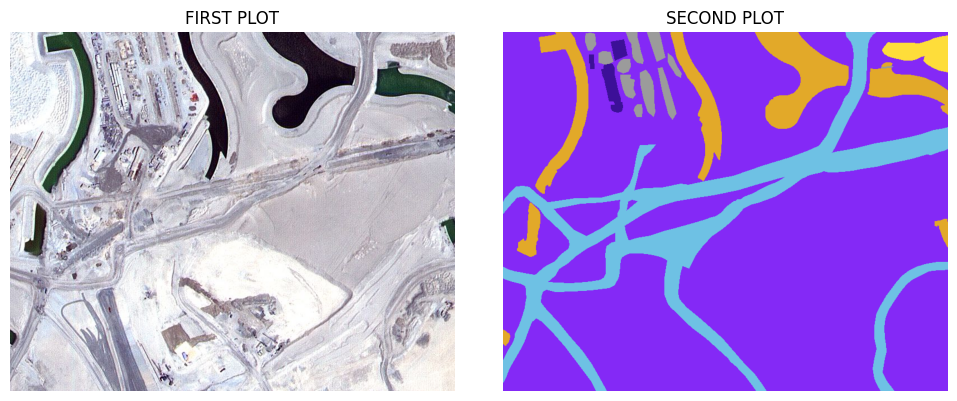

(644, 797, 3)
(644, 797, 3)


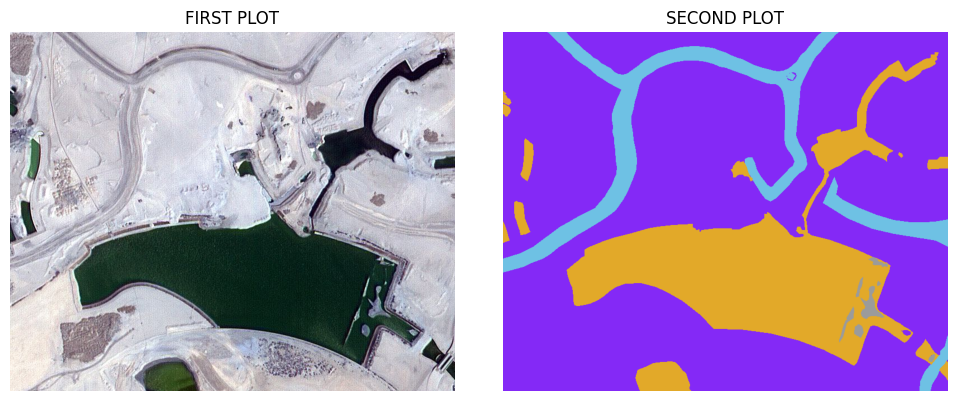

(644, 797, 3)
(644, 797, 3)


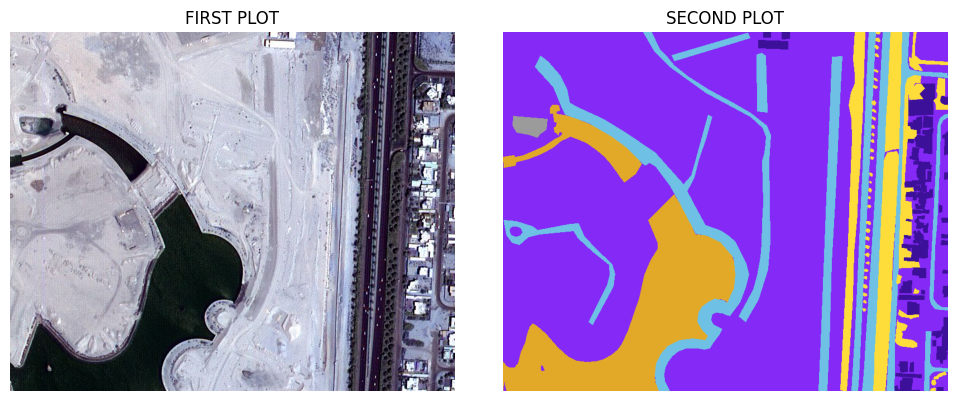

(643, 797, 3)
(643, 797, 3)


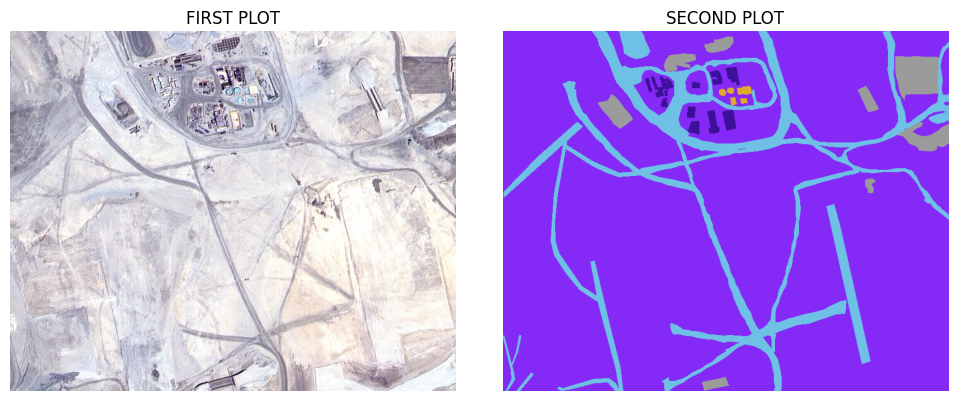

(643, 797, 3)
(643, 797, 3)


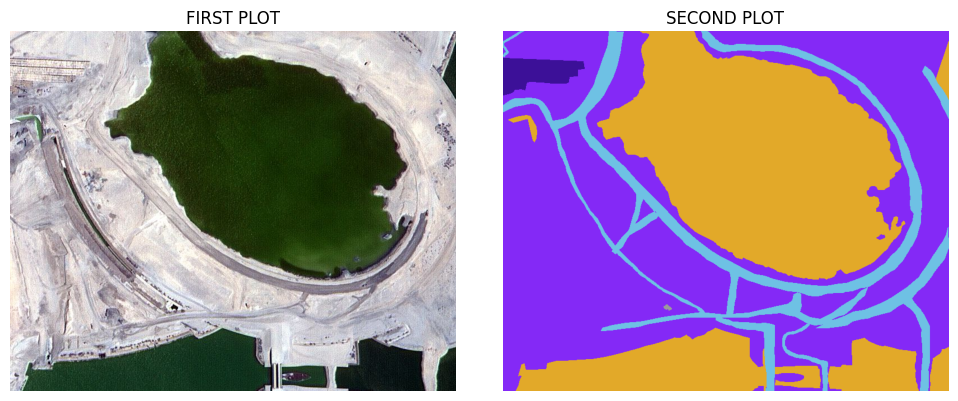

(643, 797, 3)
(643, 797, 3)


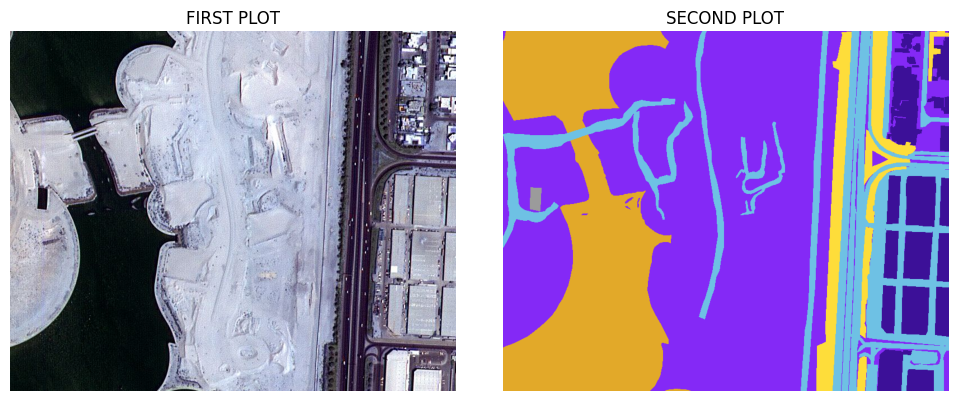

(644, 797, 3)
(644, 797, 3)


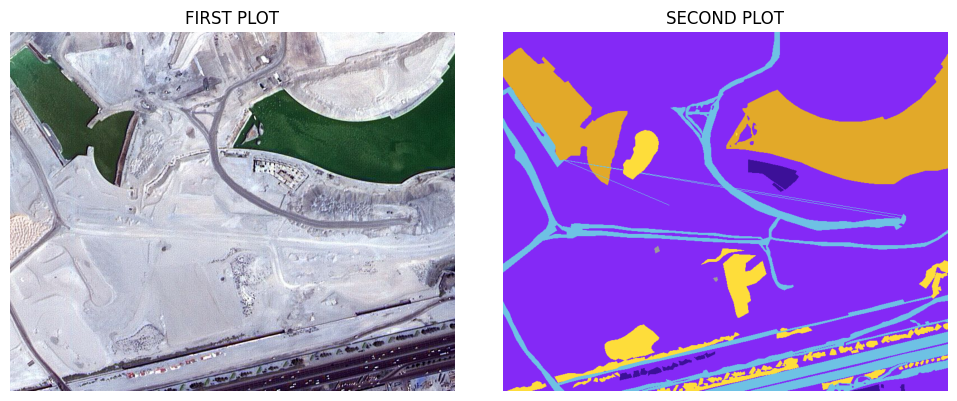

(644, 797, 3)
(644, 797, 3)


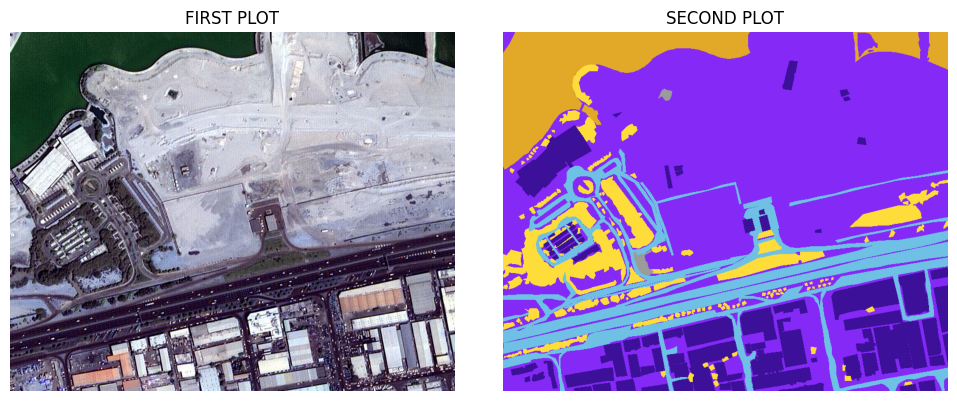

(644, 797, 3)
(644, 797, 3)


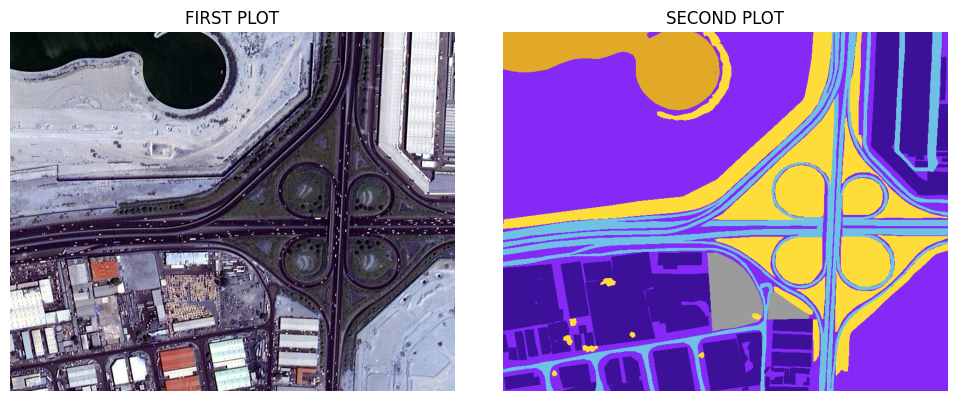

(544, 509, 3)
(544, 509, 4)


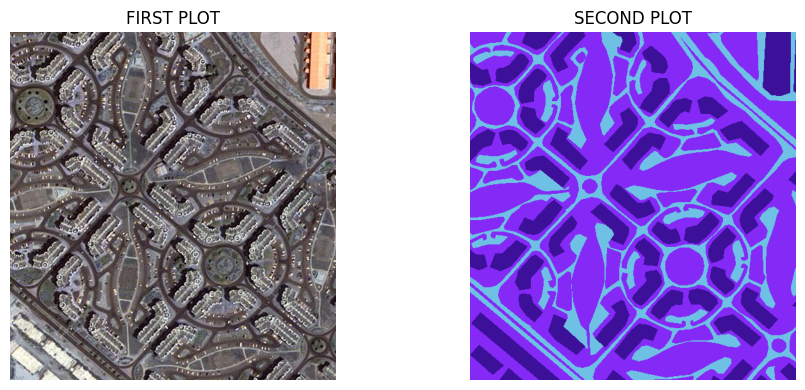

In [4]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.figure(figsize=(10, 4))
# First subplot
    plt.subplot(1, 2, 1)
    image = plt.imread(images_rgb[i])
    print(image.shape)
    plt.imshow(image)
    plt.title("FIRST PLOT")
    plt.axis('off')  # optional: turn off axis numbers

# Second subplot
    plt.subplot(1, 2, 2)
    image1 = plt.imread(images_mask[i])
    print(image1.shape)
    plt.imshow(image1)
    plt.title("SECOND PLOT")
    plt.axis('off')  # optional

    plt.tight_layout()
    plt.show()


In [5]:
import cv2

def images_to_numpy_array(file_name):
    image = plt.imread(file_name)
    image1 = image[:256,:256,:3]  # cv2 expects (width, height) # reduce color channels if needed
    return image1


In [6]:
images_rgb_numpy = []
images_mask_numpy = []

for i in range(len(images_rgb)):
    k = images_rgb[i]
    l = images_mask[i]
    image = images_to_numpy_array(k)
    image1 = images_to_numpy_array(l)
    images_rgb_numpy.append(image)
    images_mask_numpy.append(image1)

print(len(images_rgb_numpy))
print(len(images_mask_numpy))
    

63
63


In [7]:
color_uniquesness  = []
for k in range(63):
    for i in range(256):
        for j in range(256):
            l,m,n = images_mask_numpy[k][i,j]
            final_list = [l,m,n]
            if final_list not in color_uniquesness:
                color_uniquesness.append(final_list)
print(len(color_uniquesness))


7


In [8]:
print(color_uniquesness)

[[0.5176471, 0.16078432, 0.9647059], [0.8862745, 0.6627451, 0.16078432], [0.60784316, 0.60784316, 0.60784316], [0.23529412, 0.0627451, 0.59607846], [0.43137255, 0.75686276, 0.89411765], [0.99607843, 0.8666667, 0.22745098], [0.0, 0.0, 0.0]]


In [9]:
def convert_semantic_map(file):
    zero_numpy_array = np.zeros((256, 256, 6))
    class_list = np.zeros((256, 256))
    
    color_dictionary = {
        "class1": [0.5176471, 0.16078432, 0.9647059],
        "class2": [0.8862745, 0.6627451, 0.16078432],
        "class3": [0.60784316, 0.60784316, 0.60784316],
        "class4": [0.23529412, 0.0627451, 0.59607846],
        "class5": [0.43137255, 0.75686276, 0.89411765],
        "class6": [0.99607843, 0.8666667, 0.22745098],
    }

    classes = list(color_dictionary.keys())

    for i in range(256):
        for j in range(256):
            pixel = file[i, j]
            for k, class_name in enumerate(classes):
                if np.allclose(color_dictionary[class_name], pixel, atol=1e-2):
                    zero_numpy_array[i, j, k] = 1
                    class_list[i, j] = k
                    break

    return class_list, zero_numpy_array


In [10]:
images_semantic_mapping  = []
class_list_set = []
for i in range(len(images_rgb_numpy)):
    image = images_mask_numpy[i]
    class_list , semantic_mapping = convert_semantic_map(image)
    images_semantic_mapping.append(semantic_mapping)
    class_list_set.append(class_list)
print(len(images_semantic_mapping))



63


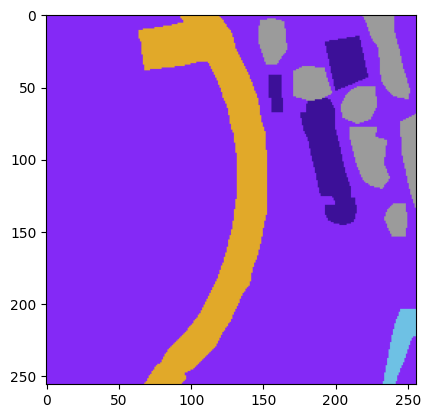

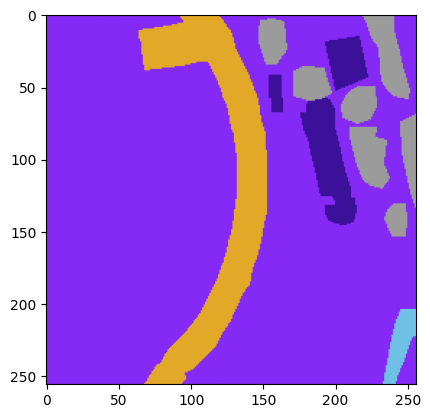

In [11]:
import matplotlib.pyplot as plt
def convert_back(class_file):
    image_numpy_array = np.zeros((256,256,3))
    color_dictionary = { "class1":[0.5176471, 0.16078432, 0.9647059],
    "class2":[0.8862745, 0.6627451, 0.16078432],
    "class3":[0.60784316, 0.60784316, 0.60784316],
            "class4":[0.23529412, 0.0627451, 0.59607846],
            "class5":[0.43137255, 0.75686276, 0.89411765],
            "class6": [0.99607843, 0.8666667, 0.22745098],
    }

    colors_list = ["class1","class2","class3","class4","class5","class6"]
    for i in range(256):
        for j in range(256):
            coordinate_class = int(class_file[i,j])
            color = colors_list[coordinate_class]
            image_numpy_array[i,j][0] ,image_numpy_array[i,j][1], image_numpy_array[i,j][2] = color_dictionary[color]

    return image_numpy_array

returned = convert_back(class_list_set[0])
plt.imshow(returned)
plt.show()

plt.imshow(images_mask_numpy[0])
plt.show()


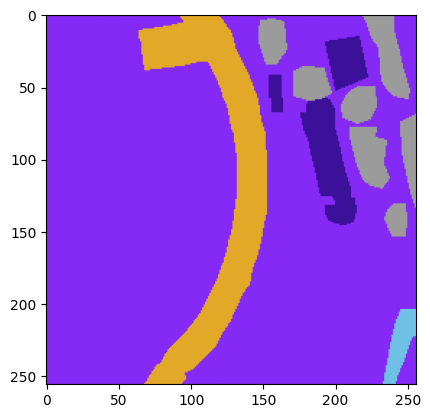

[0.60784316 0.60784316 0.60784316]


In [12]:
import matplotlib.pyplot as plt
plt.imshow(images_mask_numpy[0])
plt.show()
print(images_mask_numpy[0][98,250])

In [13]:
print(len(images_semantic_mapping))
#now lets divide into triangles test and split 
images_semantic_mapping_train = images_semantic_mapping[:30]
images_semantic_mapping_second_train = images_semantic_mapping[30:50]
images_semantic_mapping_valid = images_semantic_mapping[50:55]
images_semantic_mapping_test = images_semantic_mapping[55:63]


images_rgb_numpy_train = images_rgb_numpy[:30]
images_rgb_numpy_second_train = images_rgb_numpy[30:50]
images_rgb_numpy_valid = images_rgb_numpy[50:55]
images_rgb_numpy_mapping_test = images_rgb_numpy[55:63]


63


In [15]:
#now having created  the data lets create  the baseline unet model 
#now we have the original image and the corresponding semantic map
#Now lets create the baseline unet model 

import tensorflow as tf
from tensorflow.keras import layers

from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, UpSampling2D, GlobalAveragePooling2D, AveragePooling2D, 
    Dense, Concatenate, Input, Multiply
)
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Lambda
from tensorflow.keras.initializers import HeNormal
from keras.utils import plot_model




In [16]:
#now first lets create the baseline unet model 
def convolution_block(previous_layer, number_of_filters):
    CONV_1 = Conv2D(number_of_filters,padding = "same",activation = "relu", kernel_size = (3,3))(previous_layer)
    CONV_2 = Conv2D(number_of_filters, padding = "same", activation = "relu", kernel_size = (3,3))(CONV_1)
    return CONV_2

input = Input((256,256,3))
#now we pass it through a layer of convolution layers 
input_conv = Conv2D(64,(3,3),activation = 'relu',padding = 'same',kernel_initializer = HeNormal())(input)
k_1 = convolution_block(input_conv,64)
maxpool_layer = MaxPooling2D()(k_1)
k_2 = convolution_block(maxpool_layer,64)
maxpool_layer2 = MaxPooling2D()(k_2)
k_3 = convolution_block(maxpool_layer2,32)
maxpool_layer3 = MaxPooling2D()(k_3)
k_4  = convolution_block(maxpool_layer3, 16)
#now i have coded the  encoder layer of the unet , now lets try to code the decoder layer of the unet mode 
k_5  = convolution_block(k_4,32)
upsample_1 = UpSampling2D((2,2))(k_5)
concatenate = Concatenate()([upsample_1,k_3])
k_6 = convolution_block(concatenate,64)
upsample_2 = UpSampling2D((2,2))(k_6)
convolution = Conv2D(64,(3,3),padding = "same", activation = "relu")(upsample_2)
k_7 = Concatenate()([convolution,k_2])
k_8 = convolution_block(k_7,64)

upsample_2 = UpSampling2D((2,2))(k_8)
k_9 = Conv2D(64,(3,3), padding = "same", activation = "relu")(upsample_2)
k_10 = Concatenate()([k_9,k_1])
k_13 = convolution_block(k_10 ,10)
k_15 = Conv2D(6,(1,1), activation = "softmax", padding = "same")(k_13)


#now lets wrap the model 
baseline_unet_model = Model(inputs = input, outputs = k_15)
baseline_unet_model.summary()






2025-05-02 13:45:56.911513: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │          1,792 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d[0][0]           │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 64)   │         36,928 │ conv2d_1[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 64)   │              0 │ conv2d_2[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ max_pooling2d[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 64)   │         36,928 │ conv2d_3[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_1           │ (None, 64, 64, 64)     │              0 │ conv2d_4[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 64, 64, 32)     │         18,464 │ max_pooling2d_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 64, 64, 32)     │          9,248 │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_2           │ (None, 32, 32, 32)     │              0 │ conv2d_6[0][0]         │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 32, 32, 16)     │          4,624 │ max_pooling2d_2[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 32, 32, 16)     │          2,320 │ conv2d_7[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 32, 32, 32)     │          4,640 │ conv2d_8[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_10 (Conv2D)        │ (None, 32, 32, 32)     │          9,248 │ conv2d_9[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ up_sampling2d             │ (None, 64, 64, 32)     │              0 │ conv2d_10[0][0]        │
│ (UpSampling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 64, 64, 64)     │              0 │ up_sampling2d[0][0],   │
│                           │                        │                │ conv2d_6[0][0]         │
├──────────────────────

 Total params: 468,986 (1.79 MB)

 Trainable params: 468,986 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
#now we have denormalized the image . 
#next we now try to build the unet model , infused with attention 
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Lambda
from tensorflow.keras.layers import Input

from tensorflow.keras.layers import (
    Conv2D, MaxPooling2D, UpSampling2D, GlobalAveragePooling2D, AveragePooling2D, 
    Dense, Concatenate, Input, Multiply
)
from tensorflow.keras.layers import BatchNormalization

from tensorflow.keras.models import Model

class TeacherNetwork:
    def __init__(self, weight, reduction_amount):
        self.activation = "relu"
        self.padding = "same"
        self.kernel_size = (3, 3)
        self.weight = weight  # Importance given to avg pooling
        self.reduction_amount = reduction_amount

    def encoder_layer(self, filters, last_layer):
        output1 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(last_layer)
        output2 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(output1)
        batchnorm4 = BatchNormalization()(output2)
        maxpool_layer = MaxPooling2D()(batchnorm4)
        return output2, maxpool_layer

    def decoder_layer(self, filters, last_layer):
        output1 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(last_layer)
        batchnorm3= BatchNormalization()(output1)
        output2 = Conv2D(filters, self.kernel_size, activation=self.activation, padding=self.padding)(batchnorm3)
        upsample_layer = UpSampling2D(size=(2,2), interpolation="nearest")(output2)
        return upsample_layer
    def channel_attention_layer(self, input_tensor, filters):
        pooled_tensor = MaxPooling2D()(input_tensor)
        avg_pool = GlobalAveragePooling2D()(pooled_tensor)

        avg_pool1 = AveragePooling2D((2, 2))(input_tensor)
        avg_pool2 = GlobalAveragePooling2D()(avg_pool1)

    # First branch
        dense_layer = Dense(filters, activation="relu")(avg_pool)
        dense_layer1 = Dense(filters // 2, activation="relu")(dense_layer)
        dense_layer2 = Dense(filters, activation="relu")(dense_layer1)

    # Second branch
        dense_layer3 = Dense(filters, activation="relu")(avg_pool2)
        dense_layer4 = Dense(filters // 2, activation="relu")(dense_layer3)
        dense_layer5 = Dense(filters, activation="relu")(dense_layer4)

    # Concatenate and final squeeze
        concatenate_layer = Concatenate(axis=-1)([dense_layer2, dense_layer5])
        dense_layer6 = Dense(filters, activation="sigmoid")(concatenate_layer)

    # ✅ Corrected reshape
        attention = tf.keras.layers.Reshape((1, 1, filters))(dense_layer6)
        output_filters = input_tensor * attention
        return output_filters


    def spatial_attention_layer(self, input_tensor, filters):
        input_tensor1 = self.channel_attention_layer(input_tensor, filters)

        maxpool_tensor = MaxPooling2D((2, 2))(input_tensor1)
        average_tensor = AveragePooling2D((2, 2))(input_tensor1)

        # Adjust importance
        average_tensor = self.weight * average_tensor
        maxpool_tensor = (1 - self.weight) * maxpool_tensor

        concatenated_filters = Concatenate(axis=-1)([average_tensor, maxpool_tensor])
        convolution_filter = Conv2D(filters, (3,3), padding="same", activation="relu",kernel_initializer =  HeNormal())(concatenated_filters)
        batchnorm5 = BatchNormalization()(convolution_filter)
        convolution_filter2 = Conv2D(1, (3,3), padding="same", activation="sigmoid")(batchnorm5)
        batchnorm6 = BatchNormalization()(convolution_filter2)

        upsampled_filter = UpSampling2D((2,2))(batchnorm6)
        spatial_filter= input_tensor1*upsampled_filter
        return spatial_filter

    def attention_block(self, input_tensor, filters):
        return self.spatial_attention_layer(input_tensor, filters)

    def build_model(self, input_shape):
        inputs = Input(shape=input_shape)
        input_conv = Conv2D(16,(3,3),padding = "same",activation ="relu" , kernel_initializer = HeNormal())(inputs)
        
        enc1, pool1 = self.encoder_layer(16, input_conv)
        enc2, pool2 = self.encoder_layer(32, pool1)
        enc3, pool3 = self.encoder_layer(32, pool2)
        enc4, _ = self.encoder_layer(64, pool3)

        att1 = self.attention_block(enc1, 16)
        att2 = self.attention_block(enc2, 32)
        att3 = self.attention_block(enc3, 32)


        
        dec6 = self.decoder_layer(64, enc4)
        concat5 = Concatenate(axis=-1)([att3, dec6])
        dec5 = self.decoder_layer(32, concat5)

        concat4 = Concatenate(axis=-1)([att2, dec5])
        dec4 = self.decoder_layer(32, concat4)

        concat3 = Concatenate(axis=-1)([att1, dec4])
        dec3 = self.decoder_layer(16, concat3)

        maxpool_layer = MaxPooling2D()(dec3)

        concat1 = Concatenate(axis=-1)([att1, maxpool_layer])
        batchnorm11 = BatchNormalization()(concat1)
        output_tensor1 = Conv2D(20, (3, 3), activation=self.activation, padding=self.padding)(batchnorm11)
        output_tensor1 = Conv2D(20, (3, 3), activation=self.activation, padding=self.padding)(batchnorm11)

        output_tensor1 = Conv2D(15, (3, 3), activation=self.activation, padding=self.padding)(batchnorm11)
        output_tensor1 = Conv2D(15, (3, 3), activation=self.activation, padding=self.padding)(batchnorm11)
        
        batchnorm12 = BatchNormalization()(output_tensor1)
        output_tensor3 = Conv2D(10,(3,3),activation = self.activation,padding = self.padding)(batchnorm12)
        
        output_tensor4 = Conv2D(5,(3,3),activation = "relu",padding = "same")(output_tensor3)
        output_tensor2 = Conv2D(6, (1, 1), activation="softmax", padding=self.padding)(output_tensor3)
        

        #output_tensor3 = Lambda(lambda x: tf.squeeze(x, axis=-1))(output_tensor2)


        return Model(inputs, output_tensor2)

In [18]:
#after creating the class , lets now create an object 

teacher_unet = TeacherNetwork(0.5,2)
spatial_teacher_model = teacher_unet.build_model((256,256,3))
spatial_teacher_model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_20 (Conv2D)        │ (None, 256, 256, 16)   │            448 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_21 (Conv2D)        │ (None, 256, 256, 16)   │          2,320 │ conv2d_20[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_22 (Conv2D)        │ (None, 256, 256, 16)   │          2,320 │ conv2d_21[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 16)   │             64 │ conv2d_22[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 128, 128, 16)   │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_23 (Conv2D)        │ (None, 128, 128, 32)   │          4,640 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_24 (Conv2D)        │ (None, 128, 128, 32)   │          9,248 │ conv2d_23[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 128, 128, 32)   │            128 │ conv2d_24[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_4           │ (None, 64, 64, 32)     │              0 │ batch_normalization_1… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_25 (Conv2D)        │ (None, 64, 64, 32)     │          9,248 │ max_pooling2d_4[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_26 (Conv2D)        │ (None, 64, 64, 32)     │          9,248 │ conv2d_25[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_11          │ (None, 32, 32, 32)     │              0 │ conv2d_26[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_pooling2d_4       │ (None, 32, 32, 32)     │              0 │ conv2d_26[0][0]        │
│ (AveragePooling2D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 32)             │              0 │ max_pooling2d_11[0][0] │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_poolin

 Total params: 304,396 (1.16 MB)

 Trainable params: 303,688 (1.16 MB)

 Non-trainable params: 708 (2.77 KB)

In [19]:
plot_model(spatial_teacher_model,show_layer_names = True)

In [20]:
#here we design the heirarchical attention 
def conv_block(input_layer,number_of_filters):
    conv_1 = Conv2D(number_of_filters,(3,3),padding= "same",activation = "relu")(input_layer)
    conv_2 = Conv2D(number_of_filters, (3,3), padding = "same", activation = "relu")(conv_1)
    return conv_2


def spatial_attention_layer(input_tensor, filters):
    pooled_tensor = MaxPooling2D()(input_tensor)
    avg_pool = GlobalAveragePooling2D()(pooled_tensor)

    avg_pool1 = AveragePooling2D((2, 2))(input_tensor)
    avg_pool2 = GlobalAveragePooling2D()(avg_pool1)

    # First branch
    dense_layer = Dense(filters, activation="relu")(avg_pool)
    dense_layer1 = Dense(filters // 2, activation="relu")(dense_layer)
    dense_layer2 = Dense(filters, activation="relu")(dense_layer1)

    # Second branch
    dense_layer3 = Dense(filters, activation="relu")(avg_pool2)
    dense_layer4 = Dense(filters // 2, activation="relu")(dense_layer3)
    dense_layer5 = Dense(filters, activation="relu")(dense_layer4)
    # Concatenate and final squeeze
    concatenate_layer = Concatenate(axis=-1)([dense_layer2, dense_layer5])
    dense_layer6 = Dense(filters, activation="sigmoid")(concatenate_layer)

    # ✅ Corrected reshape
    attention = tf.keras.layers.Reshape((1, 1, filters))(dense_layer6)
    output_filters = input_tensor * attention

    maxpool_tensor = MaxPooling2D((2, 2))(output_filters)
    average_tensor = AveragePooling2D((2, 2))(output_filters)

    concatenated_filters = Concatenate(axis=-1)([average_tensor, maxpool_tensor])
    convolution_filter = Conv2D(filters, (3,3), padding="same", activation="relu",kernel_initializer =  HeNormal())(concatenated_filters)
    batchnorm5 = BatchNormalization()(convolution_filter)
    convolution_filter2 = Conv2D(1, (3,3), padding="same", activation="sigmoid")(batchnorm5)
    batchnorm6 = BatchNormalization()(convolution_filter2)

    upsampled_filter = UpSampling2D((2,2))(batchnorm6)
    spatial_filter= output_filters*upsampled_filter
    return spatial_filter

def hierarchical_attention_block(attention_tensor1,attention_tensor2,number_of_filters):
    upsampled_feature = UpSampling2D()(attention_tensor2)
    feature_2 = Conv2D(number_of_filters,(3,3),padding= "same",activation = "relu")(upsampled_feature)
    #lets concatenate the features of the attention tensor 1 and the attention tensior 2 
    concatenate = Concatenate()([attention_tensor1,feature_2])
    #now lets pass this concatenated feature for further  feature extraction 
    feature_3 = Conv2D(number_of_filters, (3,3),activation = "relu", padding = "same")(concatenate)
    
    return feature_3
    
    
input_1 = Input((256,256,3))
layer_1_encoder = conv_block(input_1,16) #concatenate +maxpool layer 

#here we add the spatial attention block 
spatial_attention_layer1 = spatial_attention_layer(layer_1_encoder,16) #first attention layer

maxpool_layer = MaxPooling2D()(layer_1_encoder)
layer_2_encoder = conv_block(maxpool_layer,32) #concatenate +maxpool layer 
spatial_attention_layer2 = spatial_attention_layer(layer_2_encoder,32)  #second attention layer


maxpool_layer1 = MaxPooling2D()(layer_2_encoder)
layer_3_encoder = conv_block(maxpool_layer1,64) #concatenate + maxpool_layer
spatial_attention_layer3 = spatial_attention_layer(layer_3_encoder,64) #third attention layer


#now we add the hierarchical attention for the above 3 layers 
hierarchical_attention_layer2_3 = hierarchical_attention_block(spatial_attention_layer2,spatial_attention_layer3,32)

hierarchical_attention_layer1_2 = hierarchical_attention_block(spatial_attention_layer1,spatial_attention_layer2,16)
#now we code the decoder block , with the output from the hierarchical attention 


maxpool_layer2 = MaxPooling2D()(layer_3_encoder)
layer_4_encoder = conv_block(maxpool_layer2,128) #encoder block end
layer_4_decoder = conv_block(layer_4_encoder,64)
upsampled = UpSampling2D()(layer_4_decoder)
#we now concatenate the upsamples layer and the hierarchcial attention 
hierarchical_upsampled_layer2 = Concatenate()([upsampled,spatial_attention_layer3])

conv_layer_2 = Conv2D(64,(3,3),activation = "relu",padding = "same")(hierarchical_upsampled_layer2)
conv_layer_2_2 = Conv2D(32,(3,3),activation = "relu",padding = "same")(conv_layer_2)

upsampled_2 = UpSampling2D()(conv_layer_2_2)

#now combine with the hierarchical attention of the layer_1 
hierarchical_attention_upsampled_3_2 = Concatenate()([hierarchical_attention_layer2_3,upsampled_2])

conv_block_3_1 = Conv2D(32,(3,3),activation = "relu",padding= "same")(hierarchical_attention_upsampled_3_2)
conv_block_3_2 = Conv2D(16,(3,3),activation = "relu",padding= "same")(conv_block_3_1)

upsampled_4 = UpSampling2D()(conv_block_3_2)

hierarchical_attention_upsampled_2_1 = Concatenate()([hierarchical_attention_layer1_2,upsampled_4])


#after concatenating lets pass it with a serires of convolution blocks 

Conv_layer_1_decoder = Conv2D(16,(3,3),activation = "relu",padding= "same")(hierarchical_attention_upsampled_2_1)
conv_layer_1_decoder_1 = Conv2D(16,(3,3),activation = "relu",padding= "same")(Conv_layer_1_decoder)
Conv_layer_1_decoder_2 = Conv2D(8,(3,3),activation = "relu",padding = "same")(conv_layer_1_decoder_1)
Conv_layer_1_decoder_3 = Conv2D(6,(3,3),activation = "softmax", padding = "same")(Conv_layer_1_decoder_2)

hierarchical_teacher_model = Model(inputs = input_1,outputs = Conv_layer_1_decoder_3)

hierarchical_teacher_model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_50 (Conv2D)        │ (None, 256, 256, 16)   │            448 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_51 (Conv2D)        │ (None, 256, 256, 16)   │          2,320 │ conv2d_50[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_16          │ (None, 128, 128, 16)   │              0 │ conv2d_51[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_54 (Conv2D)        │ (None, 128, 128, 32)   │          4,640 │ max_pooling2d_16[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_55 (Conv2D)        │ (None, 128, 128, 32)   │          9,248 │ conv2d_54[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_19          │ (None, 64, 64, 32)     │              0 │ conv2d_55[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_58 (Conv2D)        │ (None, 64, 64, 64)     │         18,496 │ max_pooling2d_19[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_59 (Conv2D)        │ (None, 64, 64, 64)     │         36,928 │ conv2d_58[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_20          │ (None, 32, 32, 64)     │              0 │ conv2d_59[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_pooling2d_10      │ (None, 32, 32, 64)     │              0 │ conv2d_59[0][0]        │
│ (AveragePooling2D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 64)             │              0 │ max_pooling2d_20[0][0] │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 64)             │              0 │ average_pooling2d_10[… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_17          │ (None, 64, 64, 32)     │              0 │ conv2d_55[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_pooling2d_8       │ (None, 64, 64, 32)     │              0 │ conv2d_55[0][0]        │
│ (AveragePooling2D)        │                        │                │                        │
├──────────────────────

 Total params: 705,581 (2.69 MB)

 Trainable params: 705,351 (2.69 MB)

 Non-trainable params: 230 (920.00 B)

In [32]:
for layer in spatial_teacher_model.layers:
    layer.trainable = False

In [24]:
from tensorflow.keras.layers import Input, Conv2D, AveragePooling2D, UpSampling2D, Concatenate
from tensorflow.keras.models import Model

def convolution_block(number_of_filters,previous_layer):
    conv_1= Conv2D(number_of_filters,(3,3),padding = "same", activation = "relu")(previous_layer)
    conv_2 = Conv2D(number_of_filters,(3,3),padding = "same",activation = "relu")(conv_1)
    return conv_2

def channel_attention_mechanism(starting_layer,filters):
    pooled_tensor = MaxPooling2D()(starting_layer)
    avg_pool = GlobalAveragePooling2D()(pooled_tensor)

        
    avg_pool1= AveragePooling2D((2,2))(starting_layer)

    avg_pool2 = GlobalAveragePooling2D()(avg_pool1)


    dense_layer = Dense(filters, activation="relu")(avg_pool)
    dense_layer1 = Dense(filters // 2, activation="relu")(dense_layer)
    dense_layer2 = Dense(filters, activation="relu")(dense_layer1)


    dense_layer3 = Dense(filters, activation="relu")(avg_pool2)
    dense_layer4 = Dense(filters // 2, activation="relu")(dense_layer3)
    dense_layer5 = Dense(filters, activation="relu")(dense_layer4)

        #now i concatenate the output of the two 
    concatenate_layer = Concatenate(axis = -1)([dense_layer2,dense_layer5])

    dense_layer6 = Dense(filters, activation = "sigmoid")(concatenate_layer)

    dense_layer7 = tf.keras.layers.Reshape((1, 1, filters))(dense_layer6)
        
    output_filters = Multiply()([starting_layer, dense_layer7])
    return output_filters

def spatial_attention_mechanism(starting_layers,filters):
    input_tensor1 = channel_attention_mechanism(starting_layers,filters)

    maxpool_tensor = MaxPooling2D((2, 2))(input_tensor1)
    average_tensor = AveragePooling2D((2, 2))(input_tensor1)


    concatenated_filters = Concatenate(axis=-1)([average_tensor, maxpool_tensor])
    convolution_filter = Conv2D(filters, (3,3), padding="same", activation="relu")(concatenated_filters)
    batchnorm5 = BatchNormalization()(convolution_filter)
    convolution_filter2 = Conv2D(1, (3,3), padding="same", activation="sigmoid")(batchnorm5)
    batchnorm6 = BatchNormalization()(convolution_filter2)

    upsampled_filter = UpSampling2D((2,2))(batchnorm6)
        
    spatial_filter = Multiply()([input_tensor1, upsampled_filter])
    return spatial_filter

intermediate_teacher_model = Model(
    inputs=spatial_teacher_model.input,
    outputs=spatial_teacher_model.get_layer('concatenate_11').output
)

intermediate_teacher_model1 = Model(
    inputs = spatial_teacher_model.input,
    outputs=spatial_teacher_model.get_layer('concatenate_10').output
)
    
 
# Now we have created the Teacher UNet model; next, we will create the Student model
#lets create the student model 
input = Input((256,256,3))
conv_1 = convolution_block(16,input)  #concatenate here 
spatial_attention_mechanism_student = spatial_attention_mechanism(conv_1,16)
added_attention_mechanism1 = intermediate_teacher_model(input)
concatenated_layer = Concatenate()([spatial_attention_mechanism_student, added_attention_mechanism1])
added_knowledge1 = Conv2D(16,(3,3),padding = "same", activation = "relu")(concatenated_layer)


maxpool = MaxPooling2D()(conv_1)
conv_2 = convolution_block(32,maxpool) #concatenate here 
spatial_attention_mechanism_student2 = spatial_attention_mechanism(conv_2,32)
added_attention_mechanism2 =intermediate_teacher_model1(input)
concatenated_layer3  = Concatenate()([added_attention_mechanism2,spatial_attention_mechanism_student2])
added_knowledge3 = Conv2D(16,(3,3),padding = "same", activation = "relu")(concatenated_layer3)

maxpool2 = MaxPooling2D()(conv_2)
conv_4 = convolution_block(32,maxpool2)
upsample_layer = UpSampling2D((2,2))(conv_4)
concatenate_layer  = Concatenate()([upsample_layer,added_knowledge3])
conv_5 = convolution_block(16,concatenate_layer)
upsample_layer2 = UpSampling2D((2,2),name = "up_sampling2d_8")(conv_5)
concatenate_layer2= Concatenate()([upsample_layer2,added_knowledge1])
conv_6 = convolution_block(5,concatenate_layer2)
conv_8 = Conv2D(6,(1,1),padding= "same",activation = "softmax")(conv_6)

student_model = Model(inputs = input, outputs = conv_8)

student_model.summary()



Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 256, 256, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_78 (Conv2D)        │ (None, 256, 256, 16)   │            448 │ input_layer_3[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_79 (Conv2D)        │ (None, 256, 256, 16)   │          2,320 │ conv2d_78[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_25          │ (None, 128, 128, 16)   │              0 │ conv2d_79[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_83 (Conv2D)        │ (None, 128, 128, 32)   │          4,640 │ max_pooling2d_25[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_84 (Conv2D)        │ (None, 128, 128, 32)   │          9,248 │ conv2d_83[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_26          │ (None, 64, 64, 32)     │              0 │ conv2d_84[0][0]        │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ average_pooling2d_14      │ (None, 64, 64, 32)     │              0 │ conv2d_84[0][0]        │
│ (AveragePooling2D)        │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 32)             │              0 │ max_pooling2d_26[0][0] │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d… │ (None, 32)             │              0 │ average_pooling2d_14[… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_49 (Dense)          │ (None, 32)             │          1,056 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_52 (Dense)          │ (None, 32)             │          1,056 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_50 (Dense)          │ (None, 16)             │            528 │ dense_49[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_53 (Dense)          │ (None, 16)             │            528 │ dense_52[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_51 (Dense)          │ (None, 32)             │            544 │ dense_50[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_54 (Dense)          │ (None, 32)             │            544 │ dense_53[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_23     

 Total params: 390,008 (1.49 MB)

 Trainable params: 389,326 (1.49 MB)

 Non-trainable params: 682 (2.66 KB)

In [22]:

import tensorflow as tf
from tensorflow.keras import backend as K
from tensorflow.keras.metrics import MeanIoU
from tensorflow.keras.metrics import MeanIoU


def dice_score(y_true, y_pred, smooth=1e-6):
    y_true = tf.cast(y_true,tf.float32)
    y_pred = tf.cast(y_pred,tf.float32)
    
    y_true_f = tf.reshape(y_true, [-1])
    y_pred_f = tf.reshape(y_pred, [-1])
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)



In [25]:
#Now we have created the test train and the valid set
#we now compile the model 
from tensorflow.keras.optimizers import Adam
hierarchical_teacher_model.compile(metrics = [dice_score],optimizer = Adam(learning_rate =0.0001),loss ="categorical_crossentropy")
baseline_unet_model.compile(metrics = [dice_score],optimizer = Adam(learning_rate =0.0001),loss ="categorical_crossentropy")
spatial_teacher_model.compile(metrics = [dice_score],optimizer = Adam(learning_rate =0.0001),loss ="categorical_crossentropy")
student_model.compile(metrics = [dice_score],optimizer = Adam(learning_rate =0.0001),loss ="categorical_crossentropy")

In [26]:
images_semantic_mapping_train=np.asarray(images_semantic_mapping_train)
images_semantic_mapping_second_train = np.asarray(images_semantic_mapping_second_train)
images_semantic_mapping_valid = np.asarray(images_semantic_mapping_valid)
images_semantic_mapping_test = np.asarray(images_semantic_mapping_test)
images_rgb_numpy_train = np.asarray(images_rgb_numpy_train)
images_rgb_numpy_second_train = np.asarray(images_rgb_numpy_second_train)
images_rgb_numpy_valid = np.asarray(images_rgb_numpy_valid)
images_rgb_numpy_mapping_test = np.asarray(images_rgb_numpy_mapping_test)



In [ ]:

history = baseline_unet_model.fit(images_rgb_numpy_train,images_semantic_mapping_train,validation_data = (images_rgb_numpy_valid,images_semantic_mapping_valid),epochs = 50 , verbose = 1,batch_size = 5  )

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 50s 6s/step - dice_score: 0.4510 - loss: 20.9444 - val_dice_score: 0.1869 - val_loss: 3.8551
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 7s/step - dice_score: 0.4964 - loss: 4.2538 - val_dice_score: 0.2209 - val_loss: 4.1084
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 37s 6s/step - dice_score: 0.4385 - loss: 3.1229 - val_dice_score: 0.2347 - val_loss: 3.6072
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - dice_score: 0.4245 - loss: 2.1623 - val_dice_score: 0.1885 - val_loss: 1.9352
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - dice_score: 0.3073 - loss: 1.7245 - val_dice_score: 0.2053 - val_loss: 1.8263
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 7s/step - dice_score: 0.4528 - loss: 1.5279 - val_dice_score: 0.2011 - val_loss: 1.7860
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 39s 7s/step - dice_score: 0.4197 - loss: 1.3180 - val_dice_score: 0.2070 - val_loss: 1.7615
Epoch 9/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 38s 6s/step - dice_score: 0.3969 - loss: 1.3519 - val_dice_score: 0

In [ ]:
import matplotlib.pyplot as plt

# Accuracy (if using categorical accuracy or similar)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy over Epochs')
plt.grid()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.grid()
plt.show()


In [27]:
history = spatial_teacher_model.fit(images_rgb_numpy_train,images_semantic_mapping_train,validation_data = (images_rgb_numpy_valid,images_semantic_mapping_valid),epochs = 50 , verbose = 1,batch_size = 5  )

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 51s 3s/step - dice_score: 0.2141 - loss: 1.7192 - val_dice_score: 0.1757 - val_loss: 1.8309
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - dice_score: 0.2437 - loss: 1.5855 - val_dice_score: 0.1784 - val_loss: 1.7943
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - dice_score: 0.2655 - loss: 1.5222 - val_dice_score: 0.1840 - val_loss: 1.7669
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - dice_score: 0.3056 - loss: 1.4028 - val_dice_score: 0.1898 - val_loss: 1.7444
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - dice_score: 0.3172 - loss: 1.4209 - val_dice_score: 0.1958 - val_loss: 1.7201
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - dice_score: 0.3425 - loss: 1.3168 - val_dice_score: 0.2008 - val_loss: 1.6908
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - dice_score: 0.3476 - loss: 1.3414 - val_dice_score: 0.2038 - val_loss: 1.6653
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - dice_score: 0.3755 - loss: 1.2552 - val_dice_score: 0.

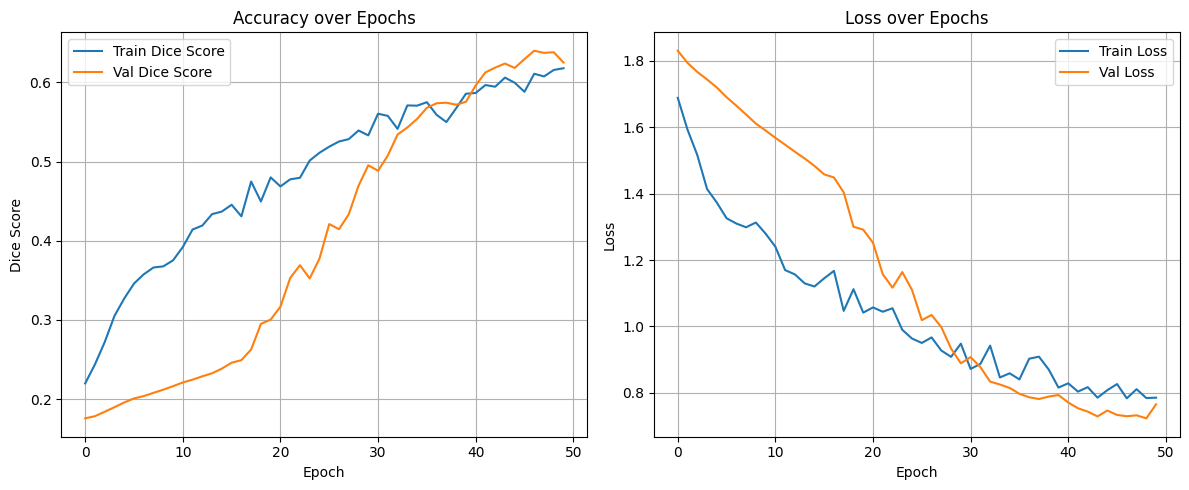

In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # Corrected line
# Accuracy (if using categorical accuracy or similar)
plt.subplot(1,2,1)
plt.plot(history.history['dice_score'], label='Train Dice Score')
plt.plot(history.history['val_dice_score'], label='Val Dice Score')
plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.legend()
plt.title('Accuracy over Epochs')
plt.grid()


# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.grid()

plt.tight_layout()
plt.show()


In [33]:
history = hierarchical_teacher_model.fit(images_rgb_numpy_train,images_semantic_mapping_train,validation_data = (images_rgb_numpy_valid,images_semantic_mapping_valid),epochs = 50 , verbose = 1,batch_size = 5  )

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 45s 3s/step - dice_score: 0.1897 - loss: 3.2196 - val_dice_score: 0.1664 - val_loss: 1.8324
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - dice_score: 0.2457 - loss: 2.2692 - val_dice_score: 0.1661 - val_loss: 1.8153
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - dice_score: 0.3147 - loss: 1.9952 - val_dice_score: 0.1666 - val_loss: 1.8098
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - dice_score: 0.3434 - loss: 1.6601 - val_dice_score: 0.1781 - val_loss: 1.8020
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - dice_score: 0.3511 - loss: 1.5521 - val_dice_score: 0.1883 - val_loss: 1.8253
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - dice_score: 0.3976 - loss: 1.4190 - val_dice_score: 0.1930 - val_loss: 1.8051
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 15s 3s/step - dice_score: 0.3911 - loss: 1.4371 - val_dice_score: 0.1927 - val_loss: 1.7353
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 16s 3s/step - dice_score: 0.3840 - loss: 1.3499 - val_dice_score: 0.

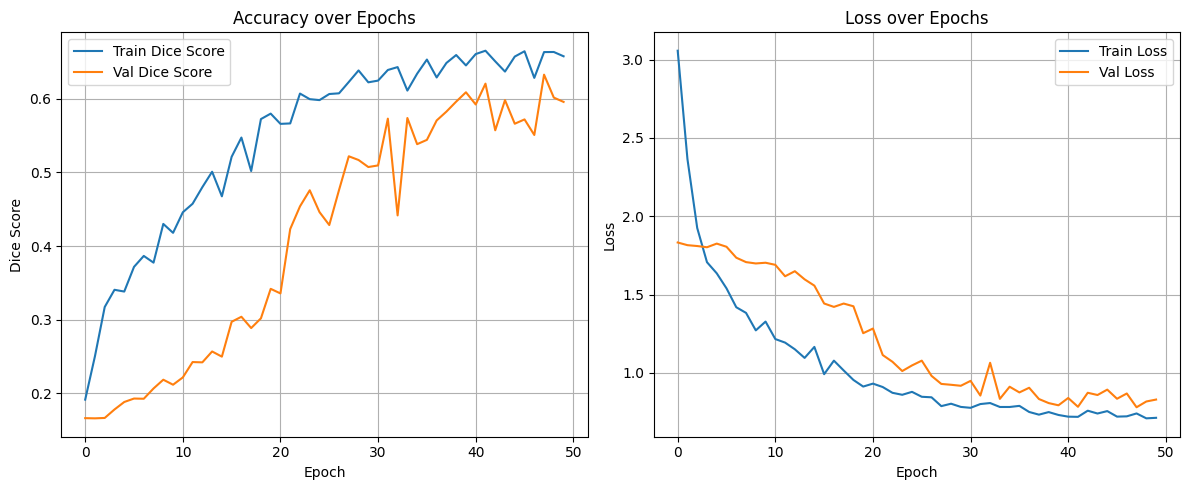

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # Corrected line
# Accuracy (if using categorical accuracy or similar)
plt.subplot(1,2,1)
plt.plot(history.history['dice_score'], label='Train Dice Score')
plt.plot(history.history['val_dice_score'], label='Val Dice Score')
plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.legend()
plt.title('Accuracy over Epochs')
plt.grid()


# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.grid()

plt.tight_layout()
plt.show()


In [37]:
history = student_model.fit(images_rgb_numpy_train,images_semantic_mapping_train,validation_data = (images_rgb_numpy_valid,images_semantic_mapping_valid),epochs = 50 , verbose = 1,batch_size = 5  )

Epoch 1/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - dice_score: 0.3190 - loss: 1.4559 - val_dice_score: 0.5712 - val_loss: 0.8541
Epoch 2/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - dice_score: 0.3374 - loss: 1.3983 - val_dice_score: 0.5809 - val_loss: 0.8470
Epoch 3/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - dice_score: 0.2778 - loss: 1.5413 - val_dice_score: 0.5875 - val_loss: 0.8433
Epoch 4/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - dice_score: 0.3147 - loss: 1.4585 - val_dice_score: 0.5936 - val_loss: 0.8476
Epoch 5/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 20s 2s/step - dice_score: 0.3081 - loss: 1.4736 - val_dice_score: 0.5981 - val_loss: 0.8551
Epoch 6/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - dice_score: 0.3400 - loss: 1.4050 - val_dice_score: 0.6016 - val_loss: 0.8535
Epoch 7/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 13s 2s/step - dice_score: 0.2987 - loss: 1.4968 - val_dice_score: 0.6039 - val_loss: 0.8450
Epoch 8/50
6/6 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - dice_score: 0.3249 - loss: 1.4354 - val_dice_score: 0.

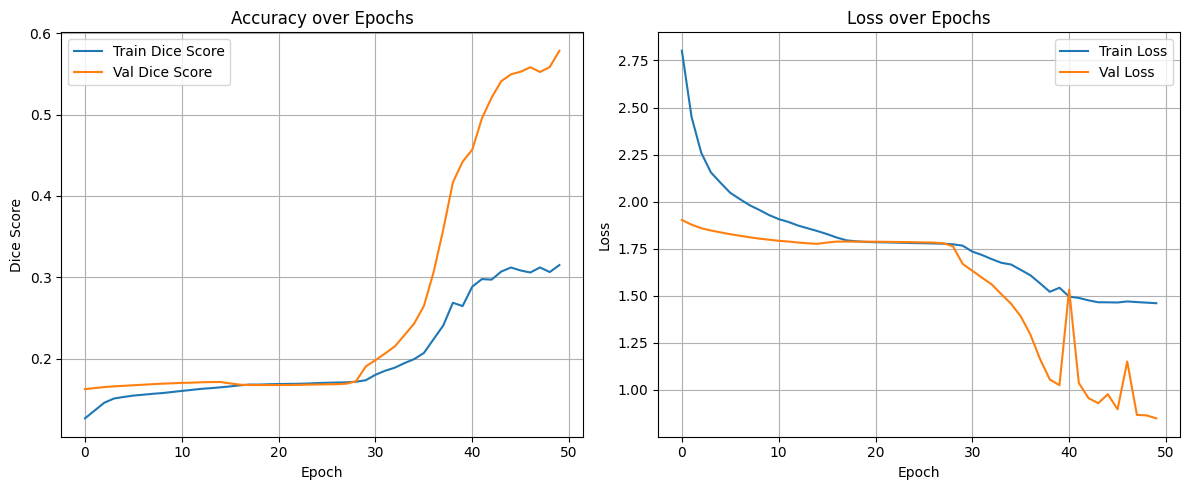

In [36]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))  # Corrected line
# Accuracy (if using categorical accuracy or similar)
plt.subplot(1,2,1)
plt.plot(history.history['dice_score'], label=' Dice Score')
plt.plot(history.history['val_dice_score'], label='Val Dice Score')
plt.xlabel('Epoch')
plt.ylabel('Dice Score')
plt.legend()
plt.title('Accuracy over Epochs')
plt.grid()


# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train  Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss over Epochs')
plt.grid()

plt.tight_layout()
plt.show()


In [ ]:
def convert_back(class_file):
    image_numpy_array = np.zeros((256,256,3))
    color_dictionary = { "class1":[0.5176471, 0.16078432, 0.9647059],
    "class2":[0.8862745, 0.6627451, 0.16078432],
    "class3":[0.60784316, 0.60784316, 0.60784316],
            "class4":[0.23529412, 0.0627451, 0.59607846],
            "class5":[0.43137255, 0.75686276, 0.89411765],
            "class6": [0.99607843, 0.8666667, 0.22745098],
    }

    colors_list = ["class1","class2","class3","class4","class5","class6"]
    for i in range(256):
        for j in range(256):
            coordinate_class = int(class_file[i,j])
            color = colors_list[coordinate_class]
            image_numpy_array[i,j][0] ,image_numpy_array[i,j][1], image_numpy_array[i,j][2] = color_dictionary[color]

    return image_numpy_array

In [42]:
student_model.save("student_model.keras")
spatial_teacher_model.save("spatial_teacher_model.keras")
hierarchical_teacher_model.save("hierarchical_teacher_model.keras")

In [43]:
import numpy as np

# Predefine your color dictionary as an array for easy mapping
color_map = np.array([
    [0.5176471, 0.16078432, 0.9647059],   # class1
    [0.8862745, 0.6627451, 0.16078432],   # class2
    [0.60784316, 0.60784316, 0.60784316], # class3
    [0.23529412, 0.0627451, 0.59607846],  # class4
    [0.43137255, 0.75686276, 0.89411765], # class5
    [0.99607843, 0.8666667, 0.22745098],  # class6
], dtype=np.float32)

def convert_back1(one_hot_mask):
    """
    Convert a (256, 256, 6) one-hot encoded mask to (256, 256, 3) RGB image.
    """
    class_indices = np.argmax(one_hot_mask, axis=-1)  # shape: (256, 256)
    rgb_image = color_map[class_indices]              # shape: (256, 256, 3)
    return rgb_image


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step


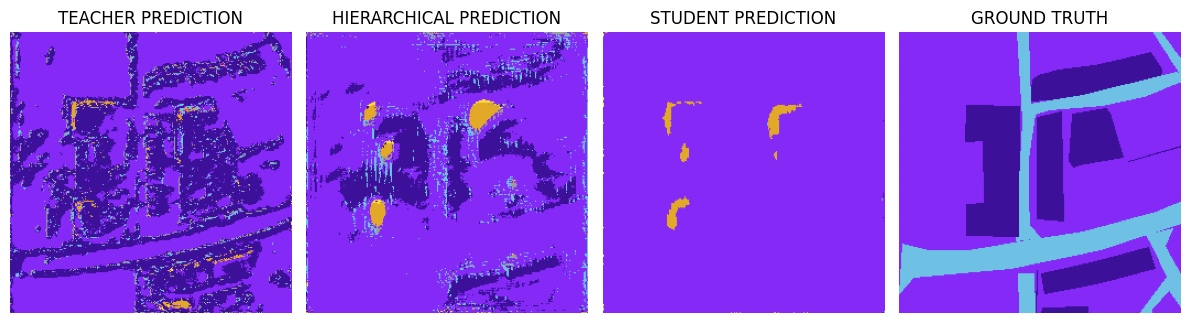

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


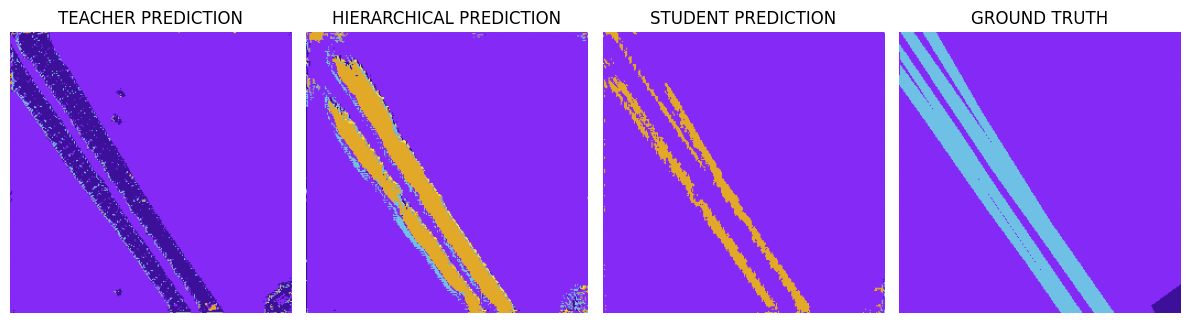

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


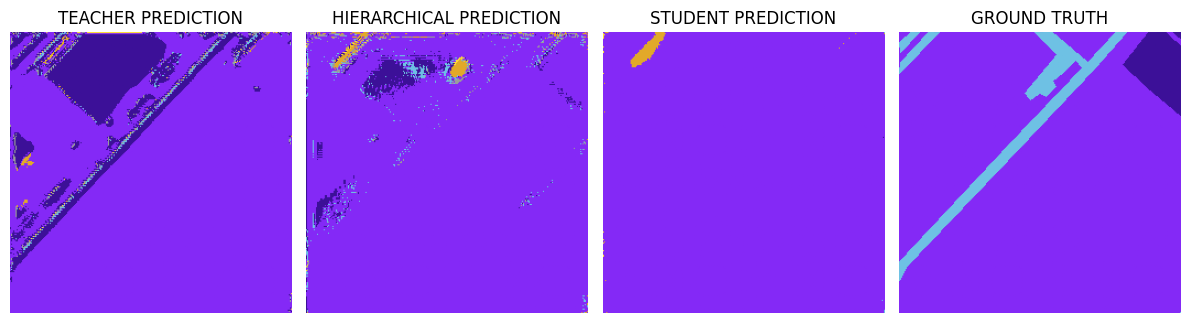

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step


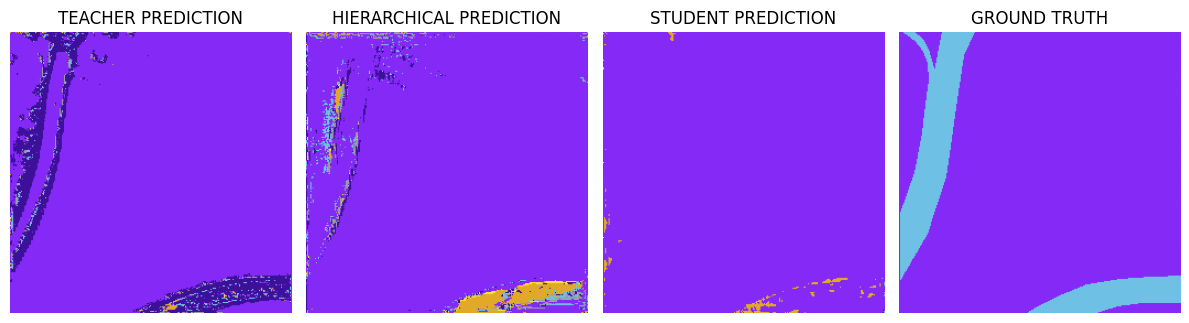

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step


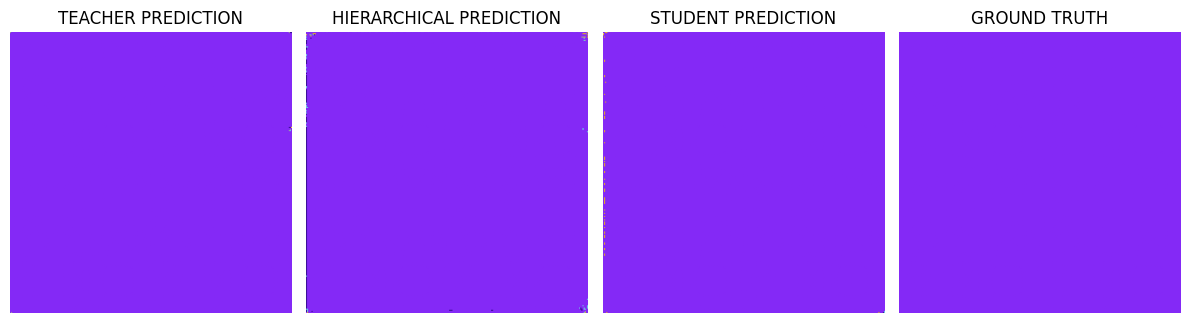

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step


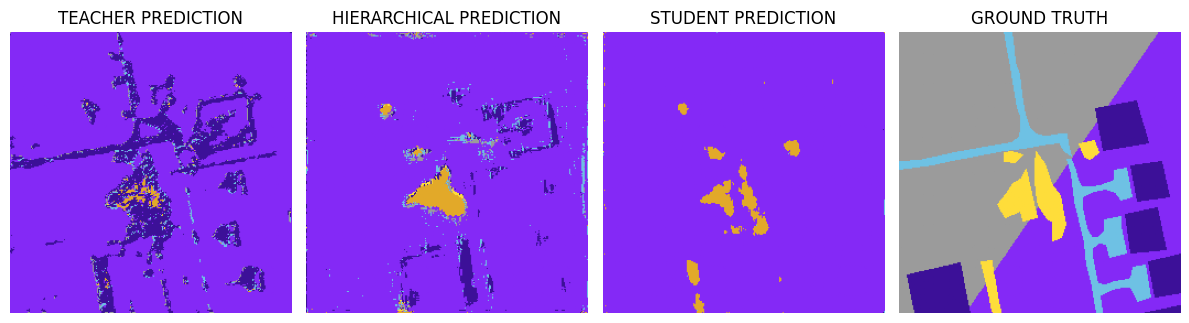

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


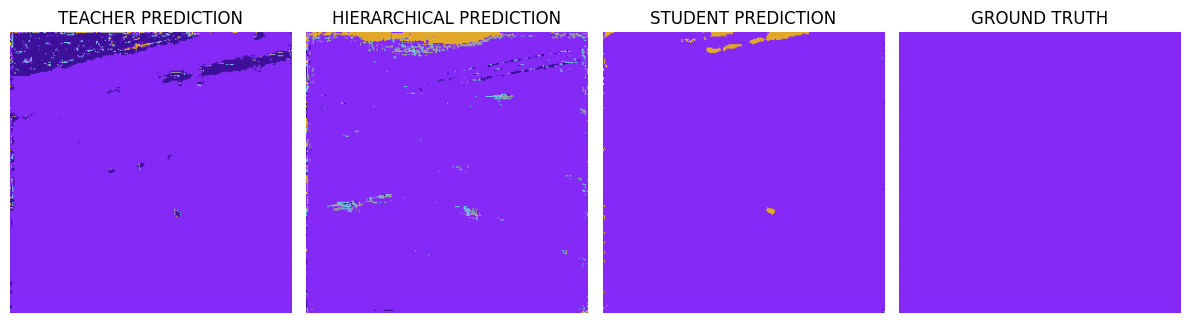

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


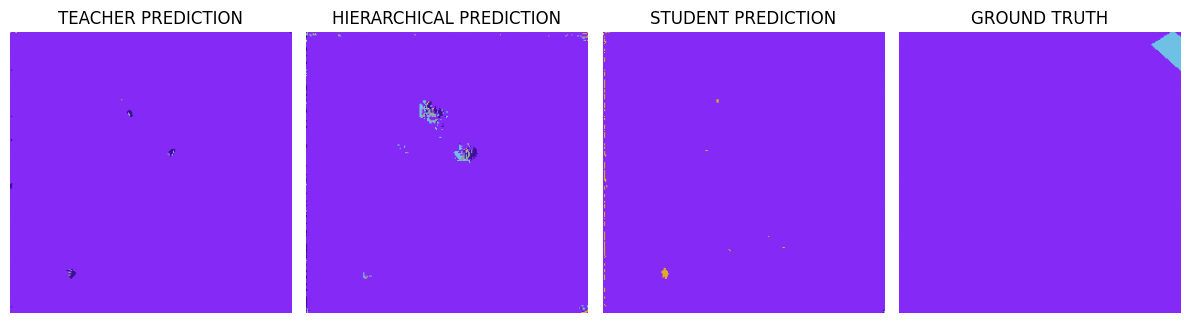

In [44]:
import numpy as np
import matplotlib.pyplot as plt

for i in range(len(images_rgb_numpy_mapping_test)):
    # Ensure input has shape (1, 256, 256, 3) — batch of RGB images
    images_expanded = np.expand_dims(images_rgb_numpy_mapping_test[i], axis=0)

    # Get predictions from each model
    prediction2 = spatial_teacher_model.predict(images_expanded)
    prediction3 = hierarchical_teacher_model.predict(images_expanded)
    prediction4 = student_model.predict(images_expanded)

    # Remove batch dimension
    prediction2 = prediction2.squeeze(axis=0)
    prediction3 = prediction3.squeeze(axis=0)
    prediction4 = prediction4.squeeze(axis=0)

    prediction2 = convert_back1(prediction2)
    prediction3 = convert_back1(prediction3)
    prediction4 = convert_back1(prediction4)

    # Ground truth mask (make sure indexing is safe)
    ground_truth = images_mask_numpy[i + 55]

    # Plotting predictions and ground truth
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(prediction2)
    plt.title("TEACHER PREDICTION")
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(prediction3)
    plt.title("HIERARCHICAL PREDICTION")
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(prediction4)
    plt.title("STUDENT PREDICTION")
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(ground_truth)
    plt.title("GROUND TRUTH")
    plt.axis('off')

    plt.tight_layout()
    plt.show()
